<a href="https://colab.research.google.com/github/elephantcastle/machine-learning-grokking/blob/main/06_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Networks**: called multilayer perceptrons; a number of perceptrons are combined to build better model; as simplification one could see them as compositions of linear classifiers that give rise to nonlinear classifiers.

Perceptrons definition:
*   Inputs: x1, x2, …, xn
*   Weights: w1, w2, …, wn
*   Bias: b
*   An activation function: Either the step function (for discrete perceptrons) or the sigmoid function (for continuous perceptrons). (Later in this chapter we learn other new activation functions.)
*   A prediction: Defined by the formula yˆ = f(w1 x1 + w2 x2 + … + wn xn + b), where f is the corresponding activation function



This is the result of combined 2 perceptrons defined by linear equations. Note that a Bias node is introduced to modulate the effect of the combination.

If we remove the activation function from a perceptron, we turn a classification model into a linear
regression model.

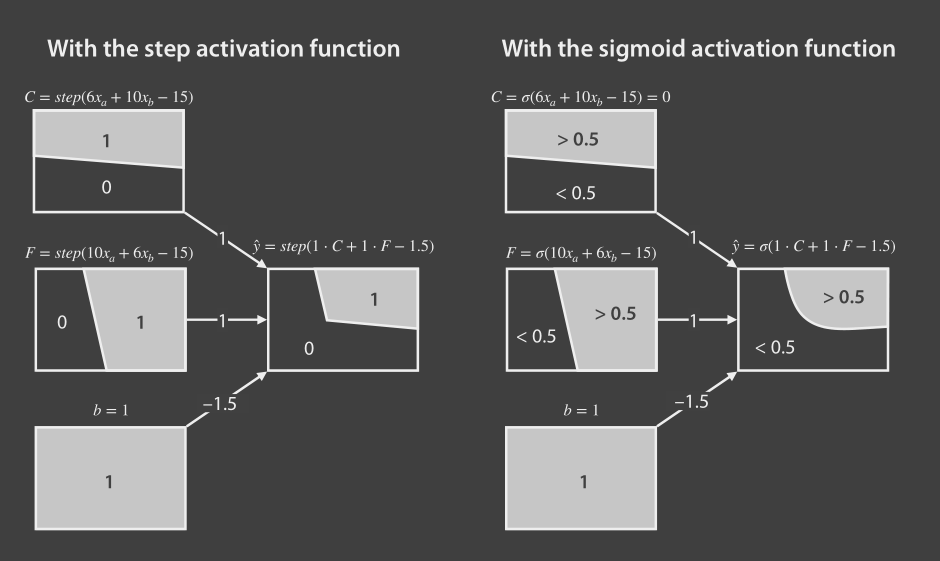

**Complex neural network can have multiple layers**: the first layer is the input layer, the final layer is the output layer, and all the layers in
between are called the hidden layers. They are often drawn without the bias nodes, but it is assumed they are part of the architecture.

**Fully Connected**: no connections happen between nonconsecutive
layers.

[TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.15835&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Steps in the process:
1.   Initializing all the weights and biases at random
2.   Define an error function to measure the performance of the neural network (log loss)
3.   Use the error function to tune in the weights and biases of the model to reduce the error function through Backpropagation.
4.   Return the output, if we want more than one output we use the softmax function

**Backpropagation**(keep repeating the below):
–    Calculate the loss function and its gradient (namely, the derivatives with respect to each one of the weights and biases).

–    Take a small step in the direction opposite to the gradient to decrease the loss function by a small amount.


If a classifier is good, its weight gets increased by a small amount, and if it is bad, its weight gets decreased.

Problems with Neural Networks:
*   Overfitting: 
*   Vanishing Gradients: Activation function(for example a sigmoid) has declining slopes, that means that composing several of them leads to little slopes and it takes long time to train a model


Solutions:
*   Regularization: A way to reduce overfitting by punishing higher weights; L1 or L2 regulatization
*   Dropout: Making sure a few strong nodes are not dominating the training; At different epochs, we pick random nodes to remove from the training to give all the nodes an opportunity to update their weights and not have a few single nodes dominating the training.



Some of the most important hyperparameters in neural networks follow:
*   Learning rate $h$: the size of the step that we use during our training
*   Number of epochs: the number of steps we use for our training
*   Batch vs. mini-batch vs. stochastic gradient descent: how many points at a time enter the training process—namely, do we enter the points one by one, in batches, or all at the same time?
*   Architecture:
  *   The number of layers in the neural network
  *   The number of nodes per layer
  *   The activation functions used in each node
*   Regularization parameters:
  *   L1 or L2 regularization
  *   The regularization term $l$
  *   Dropout probability $p$

# Neural Network Example with Keras

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels, point_size=25):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = point_size,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = point_size,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    pyplot.legend(['label 1','label 0'])

def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

f = lambda x: int(x[1]>x[0])
def g(Z):
    return np.array([f(i) for i in Z])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = g(Z).reshape(xx.shape)
    pyplot.contour(xx, yy, Z, colors = 'k',linewidths = 1)
    plot_points(X, y)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.show()


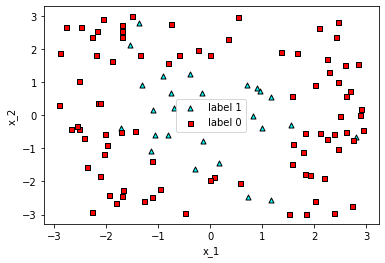

In [25]:
df = pd.read_csv('one_circle.csv', index_col=0)
x = np.array(df[['x_1', 'x_2']])
y = np.array(df['y']).astype(int)
plot_points(x,y)

In [26]:
from tensorflow.keras.utils import to_categorical
categorized_y = np.array(to_categorical(y, 2))
categorized_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [27]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               384       
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 2)                 130       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x, categorized_y, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7744 - accuracy: 0.4455
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7364
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.7636
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7636
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7636
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7636
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.7636
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7636
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.7636
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7636
Epoch 11/

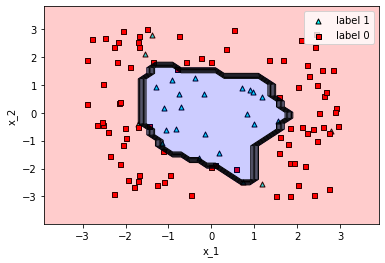

In [29]:
plot_model(x, y, model)

# Training a neural network for image recognition

Import dataset preloaded in Keras 

In [9]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Reschape data as Keras works with vectors not matrixes; also reschape the result into a vector of length 10 where 1 points to the right solution.(numbers from 0-9) 

In [6]:
x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Building and training the model

In [18]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6000/6000 [==========================

In [19]:
predictions_vector = model.predict(x_test_reshaped)
predictions = [np.argmax(pred) for pred in predictions_vector]
predictions
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Neural networks for regression

In [20]:
import numpy as np
import pandas as pd
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

housing = pd.read_csv('Hyderabad.csv')
features = housing.drop(['Location', 'Price'], axis=1)
labels = housing['Price']

Building and training the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(38, activation='relu', input_shape=(38,)))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1))

# Compiling the model. The metrics flag is added for the model to report the root mean squared error at each epoch.
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()
model.fit(features, labels, epochs=10, batch_size=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 38)                1482      
                                                                 
 dropout_7 (Dropout)         (None, 38)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               4992      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [22]:
model.evaluate(features, labels)

79/79 [==============================] - 0s 1ms/step - loss: 30640927932416.0000 - root_mean_squared_error: 5535425.0000


[30640927932416.0, 5535425.0]

In [23]:
model.predict(features)
labels

0        6968000
1       29000000
2        6590000
3        5739000
4        5679000
          ...   
2513    11000000
2514    26000000
2515    13300000
2516    10800000
2517    10400000
Name: Price, Length: 2518, dtype: int64